# En: Toy model of the thorned barbary twig

This is a toy model of the barbery twig, see photos in my facebook post for the clear understanding of the twig thorns' geometry! 
In short, there's a thin twig that protects itself with sets of thorns. There are three thorns in each set (I also call them nodes). Three thorns in a node are perpendiculally orientated with respect to each other and also to the twig. One can imagine this as three vectors pointing in the directions of 0, 90 and 180 deg. in the polar plot (I use XY-plane later), while Z-axis represents a twig and points towargs us ([0,0] point).

__Question: By what angle these thorn nodes should be rotated relative to each other in order to provide the best protection to the twig?__

This needs to be formulated in mathematical terms. Let's assume that there are n thorns at the twig. If we look at the twig "face-on", the best protection case can be described like this:
   1. The mean separation angle between all thorns' projections must be less than (or at least comparable to) 360/n (thorns do not project on each other). 
   2. This angle's dispersion must tend to zero (all directions are equally covered). 
   
So, the task is to test different rotation angles and see when (1) and (2) are valid. 


# Ru: Простая модель колючей веточки барбариса

Это простая модель веточки барбариса, смотрите фото из моего поста в фейсбуке, чтобы ясно представить себе геометрию колючек ветки. 
Если коротко, то мы рассматриваем тонкую веточку, покрытую пучками колючек. В каждом пучке (я иногда называю их узлами) по три колючки. Эти три колючки ориентированы перпендикулярно друг другу и к самой ветке. Это можно представить себе как три вектора, ориентированных по направлению 0, 90 и 180 градусов в полярных координатах (я позже использую XY-плоскость для графиков), в то время как ось Z символизирует ветку и направлена к нам (точка [0,0]). 

__Вопрос: На какой угол имеет смысл поворачивать пучки колючек друг относительно друга, чтобы ветка была наилучшим образом защищена?__

Это надо сформулировать математически. Допустим, на каком-то отрезке ветки есть n колючек. Если посмотреть на ветку с торца, то условие наилучшей защищенности можно сформулировать как: 
   1. Средний угол между проекциями колючек должен быть меньше, чем 360/n (или хотя бы не сильно отличаться от него; это условие соответствует тому, что колючки не проецируются друг на друга).
   2. Дисперсия этого угла должна стремиться к нулю (все направления покрыты равномерно).   
   
Итак, задача состоит в том, чтобы перебрать различные значения угла поворота и выяснить, когда (1) и (2) выполняются наилучшим образом.           

In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

En: Firstly, we define several functions. 

   1. __mean_angle(d_alpha,ang_rand,n)__ calculates mean angle between XY-projections of n thorns 
       (n=3*N, where N is a number of nodes), as well as and its dispersion, given the rotation angle d_alpha.
       Argument ang_rand allows rotation angle to have a random component, such that the rotation angle equals 
       to d_alpha plus term ranging in [-ang_rand,ang_rand].
   2. __main(N,alpha_step,angmax,rand_ang,eps,sig2mean_ratio)__ - calculates the mean angle between  
       XY-projections of N thorns, as well as its dispersion, for a set of rotation angles: from zero 
       to angmax with a step of alpha_step.
   3. __good_rotangles(N,alpha_step,angmax,mean_alpha)__ - estimates how "optimal" is each rotation angle value 
       in terms of the statements (1) and (2).

Ru: Сначала определим несколько функций. 

   1. __mean_angle(d_alpha,ang_rand,n)__ - вычисляет средний угол между XY-проекциями n колючек 
      (n = 3*N, где N - число узлов), при заданном угле поворота узлов d_alpha. Аргумент ang_rand позволяет 
      ввести элемент случайности: угол поворота d_alpha будет иметь случайную добавку, изменяющуюуся 
      в пределах [-ang_rand,ang_rand].
   2. __main(N,alpha_step,angmax,rand_ang,eps,sig2mean_ratio)__ - вычисляет средний угол, а также дисперсию 
      угла между XY-проекциями n колючек для набора углов поворота: от нуля до angmax с шагом alpha_step. 
   3. __good_rotangles(N,alpha_step,angmax,mean_alpha)__ - оценивает насколько хорошо выполняются 
      условия (1) и (2) при заданном угле поворота.     

In [331]:
def mean_angle(N,d_alpha,ang_rand):
    """
    Calculates the average angle between the twig's thorns projected 
    on the XY plane  (i.e., when the twig is observed from above = 'face-on'). 
    
    Parameters
    ----------
    N : int
        Number of thorn nodes. 
    d_alpha : scalar
        Rotation angle, deg. Angle by which each next thorn node is rotated 
        relative to the previous one (rotation is in the XY plane). 
    ang_rand : scalar
        Random component added to the rotation angle ([-ang_rand,ang_rand], in deg). 

    Returns
    -------
    mean_alpha : scalar
        Mean angle between the thorns' XY-projections, deg. 
    sigma_alpha : scalar
        Standard deviation of the angle between the thorns,
    alpha1, alpha2, alpha3 : lists
        Orientations of the 1st, 2nd and 3rd thorns of each node, deg.  
    """    
    
    # Orientation of the first node, deg (where three thorns point). 
    alpha1, alpha2, alpha3 = [0], [90], [180]

    for i in range(N):
        d_alpha_r = d_alpha + ang_rand*(np.random.rand() - 0.5)/0.5
        alpha1.append(alpha1[-1] + d_alpha_r)
        alpha2.append(alpha2[-1] + d_alpha_r)
        alpha3.append(alpha3[-1] + d_alpha_r)
    
    alpha = alpha1 + alpha2 + alpha3 
    
    for i in range(len(alpha)):
        if alpha[i] > 360:
            alpha[i] = alpha[i] - 360*(alpha[i]//360)
             
    alpha = np.sort(np.array(alpha))
    alpha = np.concatenate((alpha,[360]),axis=0)
    
    diff = np.abs(np.diff(alpha))
    diff_nonzero = diff[diff>0]
    mean_alpha = np.mean(diff_nonzero)
    sigma_alpha = np.sqrt(np.mean(diff_nonzero**2)-mean_alpha**2)
    
    return (mean_alpha, sigma_alpha, (alpha1,alpha2,alpha3))

In [330]:
def main(N,alpha_step,angmax,rand_ang,ang_examples):
    """
    Calculates the average angle between the twig's thorns projected 
    on the XY plane  (i.e., when the twig is observed from above = 'face-on'). 
    
    Parameters
    ----------
    N : int
        Number of thorn nodes. 
    alpha_step : scalar
        Step in rotation angle, deg. 
    angmax : scalar
        Maximum rotation angle ti be explored, deg.
    rand_ang : scalar
        Random component added to the rotation angle ([-ang_rand,ang_rand], in deg).
    ang_axamples : list
        Min and max rotation angle for which 15 examples of the thorn's XY-projections will be extracted. 
        
    Returns
    -------
    mean_alpha : 2d-array
        Mean angle between the thorns' XY-projections, deg. Array shape is (N,int(angmax/alpha_step)).
    sigma_alpha : 2d-array
        Standard deviation of the angle between the thorns' XY-projections, deg. Same shape as of mean_alpha.
    alpha1, alpha2, alpha3 : list of lists
        Orientations of the 1st, 2nd and 3rd thorns of each node (deg) for 15 examples of the rotation angle.
    """
    
    N_examples = 15
    ang1, ang2 = ang_examples
    n = np.arange(1,N+1)     
    dalpha = np.arange(alpha_step,angmax,alpha_step)
    dalpha_examples = np.linspace(ang1,ang2,N_examples)
    ind = np.array([np.where(np.abs(i-dalpha)==np.amin(np.abs(i-dalpha)))[0][0] for i in dalpha_examples],
                   dtype=np.int)

    mean_alpha = np.zeros((len(n),len(dalpha)))
    sigma_alpha  = np.copy(mean_alpha)
    alpha1, alpha2, alpha3 = [], [], []
        
    for i in range(len(dalpha)):
        for k in range(N):
            solution = mean_angle(n[k],dalpha[i],rand_ang)
            mean_alpha[k,i], sigma_alpha[k,i] = solution[0], solution[1]
        if i in ind:
            alpha1.append(solution[2][0])
            alpha2.append(solution[2][1]) 
            alpha3.append(solution[2][2])
                        
    return (mean_alpha, sigma_alpha, (alpha1,alpha2,alpha3))

In [343]:

def good_rotangles(N,alpha_step,angmax,mean_alpha,sigma_alpha,eps,sig2mean_ratio):
    """
    Calculates the average angle between the twig's thorns projected 
    on the XY plane  (i.e., when the twig is observed from above = 'face-on'). 
    
    Parameters
    ----------
    N : int
        Number of thorn nodes. 
    alpha_step : scalar
        Step in rotation angle, deg. 
    angmax : scalar
        Maximum rotation angle ti be explored, deg.
    mean_alpha : 2d-array
        Mean angle between the thorns' XY-projections, deg. Array shape is (N,int(angmax/alpha_step)).
    sigma_alpha : 2d-array
        Standard deviation of the angle between the thorns' XY-projections, deg. Same shape as of mean_alpha.
    eps : scalar
        Maximum allowed deviation of the calculated mean angle between the thorns' XY-projections 
        from the optimal mean angle 360/n, where n is the number of thorns (criterum 1).  
    sig2mean_ratio : scalar
        Max allowed ratio of the angle between the thorns' XY-projections dispersion and the mean angle 
        (modified criterium 2). 
        
    Returns
    -------
    dalpha : 1d-array
        Set of rotation angles explored. 
    dalpha_weights : 1d-array
        Corresponding weights of each rotation angle, measure of each angle "goodness" with respect to 
        the criteria (1) and (2), expressed in arbitrary units. 
    """
    
    # Note. It's not so important that criteria (1) and (2) are fulfilled for the large number of nodes. 
    # More important is that they work locally, at reasonable linear intervals, i.e. 5-10 nodes or so. 
    # Because if the bush is protecting itself from, let's say, birds, than who cares that the its twigs 
    # and branches are not optimally covered in thorns when averaged over 1m, most important is that 
    # they are well-protected at each small interval comparable with the size of predator (or whoever it's trying 
    # to defend itself from). Therefore, small number of nodes are given higher weights during the calculation 
    # of "goodness" of fulfillment (1) and (2). 
    # Weighting function is arbitrary chosen as exponential, with a n arbitrary scale lenght of Nd = 10 nodes, 
    # and at N_br = 10 it switches to a constant. Test something else if you want!:))
    
    Nd = 5
    N_br = 10
    if N > N_br:
        N_weights1 = [np.exp(-nodes/Nd) for nodes in np.arange(1,N_br)]
        N_weights2 = [N_weights1[-1] for i in np.arange(N_br,N+2)]
        N_weights = np.array(N_weights1 + N_weights2)
    else:
        N_weights = [np.exp(-nodes/Nd) for nodes in np.arange(1,N+2)]
        
    dalpha = np.arange(alpha_step,angmax,alpha_step)
    n = np.arange(1,N+1)  
    mean_angle_best = 360/(3*n)
    
    mean_alpha_good = np.copy(mean_alpha)
    mean_alpha_good.fill(np.nan)
    
    for i in range(len(dalpha)):
        for k in range(N):
            if ((mean_alpha[k,i] < mean_angle_best[k] + eps) and 
                (sigma_alpha[k,i]/mean_alpha[k,i] < sig2mean_ratio)):  
                mean_alpha_good[k,i] = mean_alpha[k,i]
    
    dalpha_weights = np.zeros((len(dalpha))) 
    for i in range(len(dalpha)):
        
        ind_good = np.where(mean_alpha_good.T[i]*0==0)[0]
        dalpha_weights[i] = np.sum(mean_alpha_good.T[i][ind_good]*N_weights[ind_good])/np.sum(N_weights)
        
    dalpha_weights = dalpha_weights/np.amax(dalpha_weights)
    
    return (dalpha, dalpha_weights)


En: It's also convenient to define several useful plotting function. 

Ru: Также для удобства определим функции, строящие полезные графики. 

In [327]:
def plot_mean_and_sigma_ang(mean_angle_array,sigma_angle_array,N,angmax,colormap,cmap_norm):
    
    fnt_main = 14
    lp = 15 
    yticks = np.arange(0,N+2,2)
    xticks = np.arange(0,angmax+30,30)
    cbar_labels = [r'$\mathrm{\langle \Delta \alpha \rangle, \ ^{\circ}}$',
                   r'$\mathrm{\sigma_{\Delta \alpha}, \ ^{\circ}}$']
    
    fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(10,7))
    im1 = ax[0].imshow(np.flip(mean_angle_array,axis=0),extent=[0,angmax,0,N],cmap=colormap,
                     interpolation='none',aspect=angmax/N/3,
                     norm = mpl.colors.Normalize(vmin=cmap_norm[0][0],vmax=cmap_norm[0][1]))
    im2 = ax[1].imshow(np.flip(sigma_angle_array,axis=0),extent=[0,angmax,0,N],cmap=colormap,
                     interpolation='none',aspect=angmax/N/3,
                     norm = mpl.colors.Normalize(vmin=cmap_norm[1][0],vmax=cmap_norm[1][1]))
    im = [im1,im2]
    for i in range(len(ax)):
        ax[i].set_ylabel('$\mathrm{Number \ of \ thorn \ nodes}$',fontsize=fnt_main,labelpad=lp)
        ax[i].set_xticks(xticks)
        ax[i].set_yticks(yticks)
        ax[i].set_yticklabels(yticks)
        fig.subplots_adjust(left=0.1,right=0.85,top=0.93,bottom=0.12,hspace=0.1)
        pos = ax[i].get_position()
        cax = fig.add_axes([pos.x0+pos.width+0.02,pos.y0,0.025,pos.height])
        cbar = fig.colorbar(im[i],cax=cax,orientation='vertical')
        cbar.set_label(cbar_labels[i],fontsize=fnt_main,labelpad=lp)
    for (label1,label2,value) in zip(ax[0].get_yticklabels(),ax[1].get_yticklabels(),yticks):
        label1.set_visible(value%4==0)
        label2.set_visible(value%4==0)
    ax[1].set_xlabel(r'$\mathrm{\alpha_{rot}, \ ^{\circ}}$',fontsize=fnt_main,labelpad=lp)
    plt.show()
    
    return (fig, ax)


def plot_thorn_xy_projections(alpha_step,angmax,mean_alpha,sigma_alpha,alpha,ang_examples):
    
    N_examples = 15 
    fnt_main = 14
    lp = 15 
    axmax = 1.3
    colormap = mpl.cm.get_cmap('gray_r')
    ang1, ang2 = ang_examples 
    
    dalpha = np.arange(alpha_step,angmax,alpha_step)
    dalpha_examples = np.linspace(ang1,ang2,N_examples)
    ind = np.array([np.where(np.abs(i-dalpha)==np.amin(np.abs(i-dalpha)))[0][0] for i in dalpha_examples],
                   dtype=np.int)
    
    alpha1,alpha2,alpha3 = alpha
    
    fig, ax = plt.subplots(nrows=3,ncols=5,sharex=True,figsize=(13,9))
    for i in range(N_examples):
        axis = ax[i//5,i%5]
        for k in range(len(alpha1[i])):
            axis.plot([0,np.cos(np.deg2rad(alpha1[i][k]))],[0,np.sin(np.deg2rad(alpha1[i][k]))],
                      c=colormap(k/len(alpha1[i])))
            axis.plot([0,np.cos(np.deg2rad(alpha2[i][k]))],[0,np.sin(np.deg2rad(alpha2[i][k]))],
                      c=colormap(k/len(alpha1[i])))
            axis.plot([0,np.cos(np.deg2rad(alpha3[i][k]))],[0,np.sin(np.deg2rad(alpha3[i][k]))],
                      c=colormap(k/len(alpha1[i])))
            axis.plot([-axmax,axmax],[0,0],lw=0.5,ls='--',c='gray')
            axis.plot([0,0],[-axmax,axmax],lw=0.5,ls='--',c='gray')
            axis.set_xticks([])
            axis.set_yticks([])
            axis.set_xlim(-axmax,axmax)
            axis.set_ylim(-axmax,axmax)
            axis.set_aspect(1)
            axis.text(0.4,1,r'$\mathrm{\Delta\alpha=}$'+str(dalpha[ind[i]])+r'$\mathrm{^\circ}$',         
                              fontsize=int(fnt_main-4))
            axis.text(0.4,-1.1,r'$\mathrm{\langle \alpha \rangle =}$'+
                              str(int(round(mean_alpha[-1][ind[i]],0)))+r'$\mathrm{^\circ}$',
                              fontsize=int(fnt_main-4))
            axis.text(-1.2,-1.1,r'$\mathrm{\sigma_\alpha =}$'+                                                        
                              str(round(sigma_alpha[-1][ind[i]],1))+r'$\mathrm{^\circ}$',
                              fontsize=int(fnt_main-4))
        if  i//5==2:
            axis.set_xlabel('X',fontsize=fnt_main,labelpad=lp)
        if i==0 or (i==5) or (i==10):
            axis.set_ylabel('Y',fontsize=fnt_main,labelpad=lp)

    fig.subplots_adjust(left=0.07,right=0.93,bottom=0.1,wspace=0.05,hspace=0.05)
    plt.show()
    
    return (fig, ax)


def plot_rotang_best(dalpha,dalpha_weights,angmax):

    ind_best = np.where(dalpha_weights>0.9*np.amax(dalpha_weights))[0]
    dalpha_best = dalpha[ind_best]
    
    xticks = np.arange(0,angmax+30,30)
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(dalpha, dalpha_weights)
    for i in range(len(dalpha_best)):
        ax.plot([dalpha_best[i],dalpha_best[i]],[0,1],c='r',ls='--')
    ax.set_xlim(0,angmax)
    ax.set_ylim(0,1)
    ax.set_xticks(xticks)
    ax.set_yticks([])
    ax.set_ylabel('"Goodness" of rotation angle, \narbitrary units',fontsize=14,labelpad=15)
    fig.subplots_adjust(left=0.1,right=0.85,bottom=0.12)
    plt.show()
    
    print('Optimal rotation angles = ',dalpha_best[dalpha_best<180],'deg')
    
    return (fig, ax)


def plot_model(N,alpha_step,angmax,rand_ang,ang_examples,eps,sig2mean_ratio,cmap,cbar_ylim):
    
    if rand_ang!=0:
        dalpha = np.arange(alpha_step,angmax,alpha_step)
        dalpha_weights_mean = np.zeros((len(dalpha)))
        mean_alpha_mean, sigma_alpha_mean = np.zeros((N,len(dalpha))), np.zeros((N,len(dalpha)))
        N_repeat = 20 
        for k in range(N_repeat):
            S = main(N,alpha_step,angmax,rand_ang,ang_examples)
            mean_alpha, sigma_alpha = S[0], S[1]
            alpha1, alpha2, alpha3 = S[2]
            dalpha, dalpha_weights = good_rotangles(N,alpha_step,angmax,mean_alpha,sigma_alpha,eps,sig2mean_ratio)
            dalpha_weights_mean += dalpha_weights
            mean_alpha_mean += mean_alpha
            sigma_alpha_mean += sigma_alpha
        dalpha_weights = dalpha_weights_mean/N_repeat
        mean_alpha = mean_alpha_mean/N_repeat
        sigma_alpha = sigma_alpha_mean/N_repeat
    else:
        S = main(N,alpha_step,angmax,rand_ang,ang_examples)
        mean_alpha, sigma_alpha = S[0], S[1]
        alpha1, alpha2, alpha3 = S[2]
        dalpha, dalpha_weights = good_rotangles(N,alpha_step,angmax,mean_alpha,sigma_alpha,eps,sig2mean_ratio)

    plot_mean_and_sigma_ang(mean_alpha,sigma_alpha,N,angmax,cmap,cbar_ylim)
    
    plot_rotang_best(dalpha,dalpha_weights,angmax)
    
    plot_thorn_xy_projections(alpha_step,angmax,mean_alpha,sigma_alpha,(alpha1,alpha2,alpha3),ang_examples)


En: And finally we start with testing the model with the six parameters defined: N, alpha_step, angmax, eps, sig2mean_ratio, rand_ang.  
   
Ru: Теперь можем тестировать модель. Задаем несколько параметров:

   1. __N__ - максимальное количество узлов, которое будем рассматривать. 
   2. __alpha_step__ - шаг по углу поворота, в градусах. 
   3. __angmax__ - максимальный угол поворота, который будем рассматривать. Задача симметрична относителььно 
      180 градусов, но покажем полный интервал до 360 градусов. 
   4. __eps__ - максимальная допустимая разница между вычисленным средним углом между XY-проекциями колючек 
      и оптимальным средним углом для данного количества колючек (узлов), в градусах (условие 1). 
   5. __sig2mean_ratio__ - максимальное допустимое отношение дисперсии и среднего от угла между XY-проекциями 
      колючек (модифицированное условие 2). 
   6. __rand_ang__ - cлучайная компонента в угле поворота, в градусах. 

In [358]:
N = 20                  # Max number of thorn nodes to be explored 

alpha_step = 2          # Step in rotation angle, deg

angmax = 360            # Max rotation angle to be explored, deg 

eps = 3                 # Max allowed deviation of the calculated mean angle between the thorns' XY-projections 
                        # from the optimal mean angle 360/n for a given number of thorns n (criterum 1). 
sig2mean_ratio = 0.5    # Max allowed ratio of the dispersion and the mean angle  between the thorns' 
                        # XY-projections (modified criterium 2). 

rand_ang1 = 0           # Random component of the rotation angle, deg
rand_ang2 = 5           # Different values to try
rand_ang3 = 10

Ru: Пояснения к графикам. 
    
   1.  График с двумя цветными панелями показывает следующее.
   
       А. (верхняя панель): средний угол между XY-проекциями колючек, вычисленный для разных значений угла 
          поворота (ось Х) и узлов (ось Y). Значение среднего угла показано цветом. Вертикальные полосы - 
          это случаи "резонансов" - при некоторых значениях угла поворота колючки все время проецируются сами 
          на себя, так что средний угол между ними остается постоянным, даже когда число узлов растет. 
          Самый простой пример - поворот на 90, 180 и 270 градусов. 
          
       Б. (нижняя панель): дисперсия (разброс от среднего) угла между XY-проекциями колючек, вычисленная, 
          как и средний угол, для разных значений угла поворота и количества узлов. 
           
       В обоих случаях, А и Б, хорошим случаям соответствует синий цвет (маленький средний угол и 
       маленькая дисперсия = равномерная защита ветки со всех сторон, см. условия 1 и 2). 
        
        
   2.  На графике-гистограмме показаны вычисленные веса, характеризующие "эффективность" защиты ветки при 
       заданном угле поворота (вычисление весов см. в функции good_rotangles). 
       Красные вертикальные линии отмечают лучшие углы.
        
        
   3.  График с пятнадцатью панелями показывает примеры смоделированных веточек, наблюдаемых с торца. 
       На каждой панели написаны соответствующие угол поворота ("дельта альфа"), средний угол между проекциями 
       колючек (альфа в угловых скобках) и дисперсия угла между проекциями колючек ("сигма альфа"). Разными 
       оттенками серого обозначена принадлежность колючек к разным узлам. 
                 

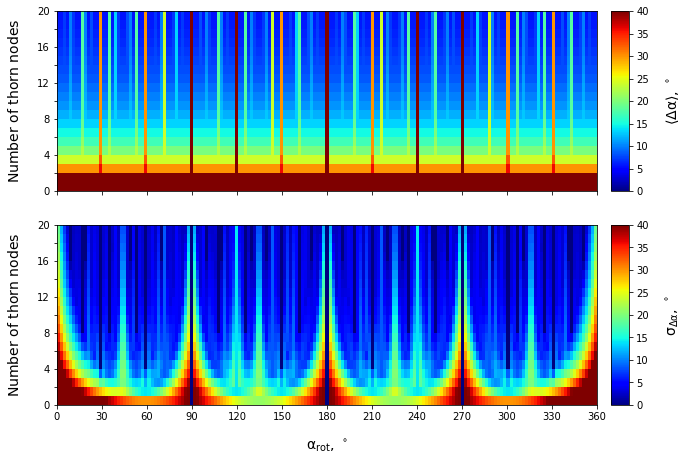

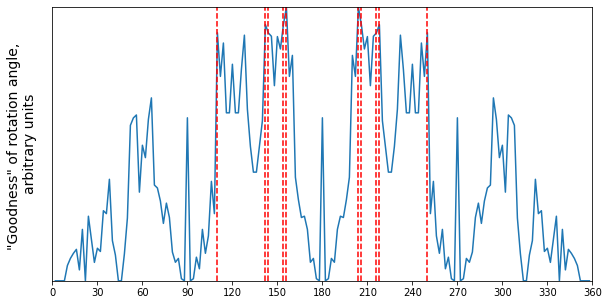

Optimal rotation angles =  [110 142 144 154 156] deg


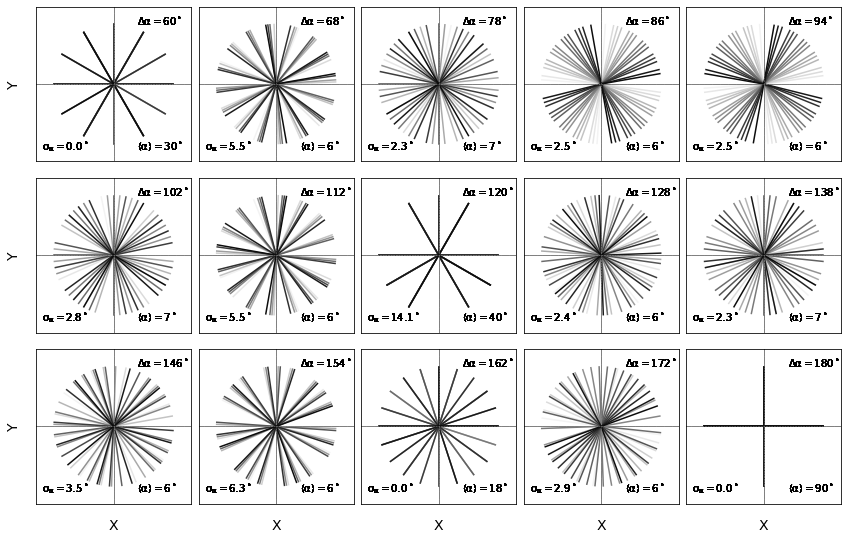

In [366]:
# Test 1. 
plot_model(N,alpha_step,angmax,rand_ang1,[60,180],eps,sig2mean_ratio,'jet',[[0,40],[0,40]])


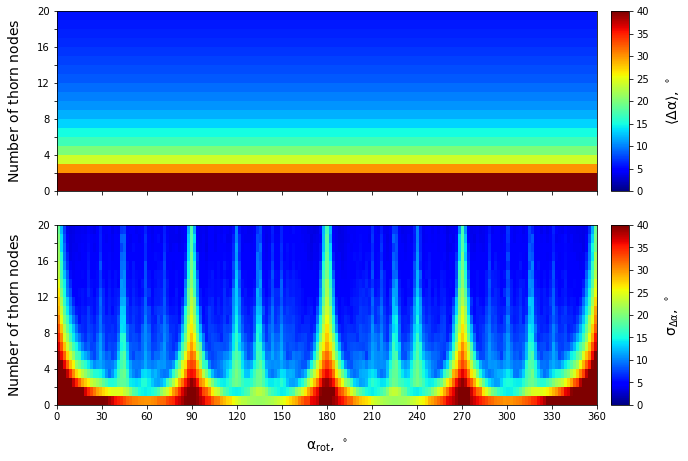

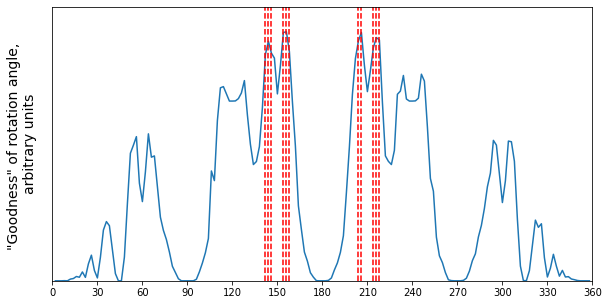

Optimal rotation angles =  [142 144 146 154 156 158] deg


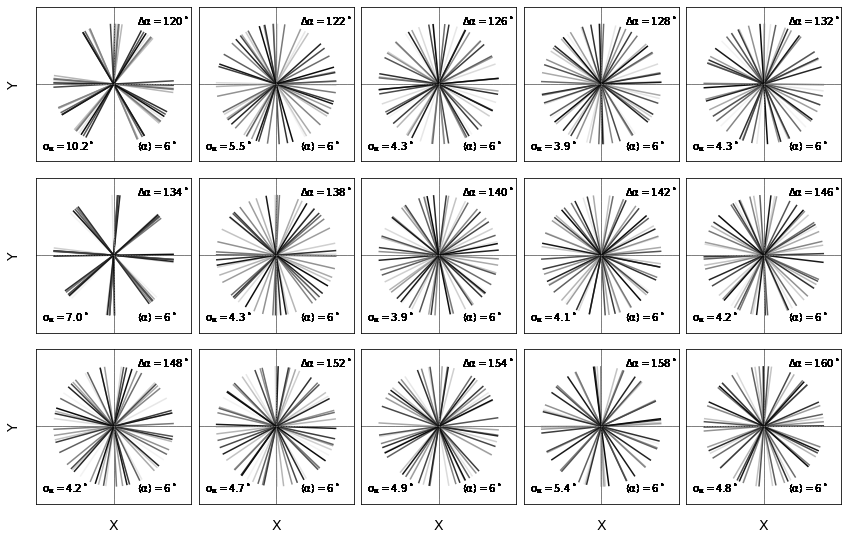

In [367]:
# Test 2. 
plot_model(N,alpha_step,angmax,rand_ang2,[120,160],eps,sig2mean_ratio,'jet',[[0,40],[0,40]])


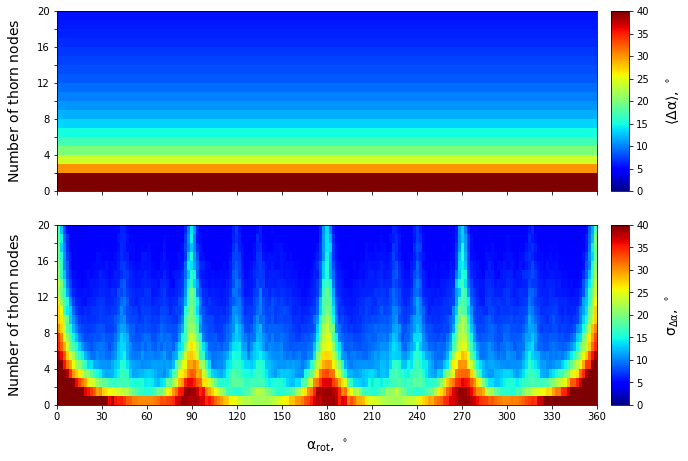

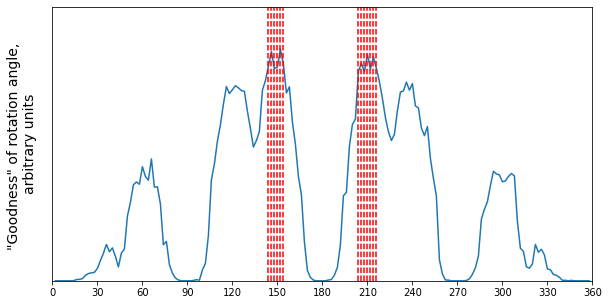

Optimal rotation angles =  [144 146 148 150 152 154] deg


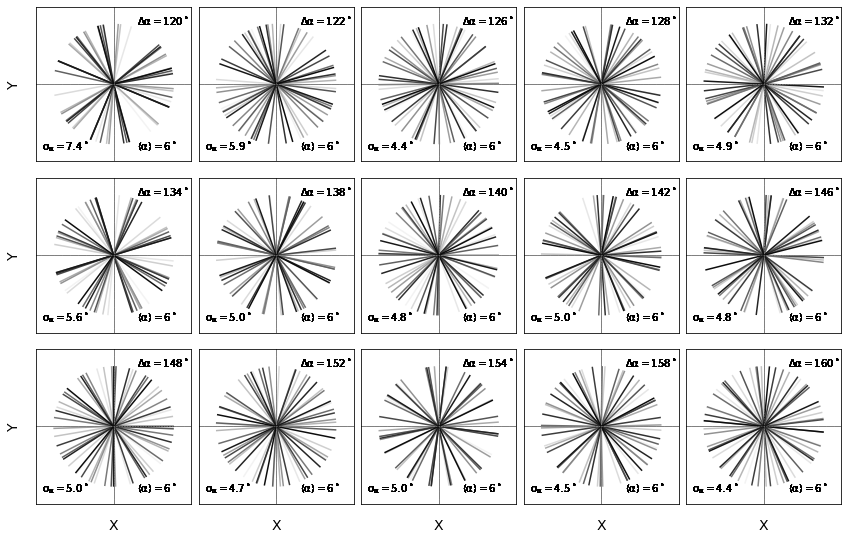

In [368]:
# Test 3. 
plot_model(N,alpha_step,angmax,rand_ang3,[120,160],eps,sig2mean_ratio,'jet',[[0,40],[0,40]])


En: The best rotation angles, according to this modelling, lay in the interval 145-155 deg. Also rotation angle just above 120 deg seems good. 

Ru: Углы в интервале 145-155 градусов выглядят, согласно данной модели, наиболее удачными. 
Угол поворота чуть больше 120 градусов тоже может быть неплохим решением.  